<a href="https://colab.research.google.com/github/Michael2004-ukpeh/perceptron-algorithm/blob/master/Multivariable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Import dataset from Kaggle


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")

print("Path to dataset files:", path)
# List the contents of the directory
display(os.listdir(path))

Using Colab cache for faster access to the 'multiple-linear-regression-dataset' dataset.
Path to dataset files: /kaggle/input/multiple-linear-regression-dataset


['multiple_linear_regression_dataset.csv']

# Read dataset with pandas


In [3]:
df = pd.read_csv(os.path.join(path, 'multiple_linear_regression_dataset.csv'))
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


# Normalize independent variables of age, X1 and income, X2


For normalization, I'll use Min-Max scaling. This method rescales the feature linearly to a given range, usually between zero and one. The formula for Min-Max scaling is: `X_norm = (X - X_min) / (X_max - X_min)`.

In [4]:
# Extract ages from values
ages = df['age'].values

# Min-Max Normalize 'age' (X1)
ages_min = np.min(ages)
ages_max = np.max(ages)

X1 = (ages - ages_min) / (ages_max - ages_min)

print("Normalized Age (X1):")
display(X1)
X1.shape[0]

Normalized Age (X1):


array([0.05714286, 0.2       , 0.68571429, 0.25714286, 0.57142857,
       0.8       , 0.14285714, 0.28571429, 0.4       , 0.45714286,
       0.17142857, 0.68571429, 0.88571429, 0.8       , 0.6       ,
       0.51428571, 1.        , 0.        , 0.6       , 0.4       ])

20

In [5]:
# Extract 'experience' as X2
exprs = df['experience'].values

# Min-Max Normalize 'experince' (X2)
exprs_min = np.min(exprs)
exprs_max = np.max(exprs)
X2 = (exprs - exprs_min) / (exprs_max - exprs_min)

print("\nNormalized Experience (X2):")
display(X2)
X2.shape[0]


Normalized Experience (X2):


array([0.    , 0.125 , 0.0625, 0.25  , 0.5625, 0.375 , 0.25  , 0.1875,
       0.25  , 0.4375, 0.    , 0.5   , 0.25  , 0.1875, 0.6875, 0.3125,
       1.    , 0.    , 0.5   , 0.5625])

20

# Extract dependent variable, Y
We dont normalize the dependent variable

In [15]:
incomes  = df['income'].values
Y.shape[0]
#  Normalize income
incomes_min = np.min(incomes)
incomes_max = np.max(incomes)
Y = (incomes - incomes_min) / (incomes_max - incomes_min)

print("\nNormalized Income (Y):")
display(Y)
Y.shape[0]



Normalized Income (Y):


array([0.07298658, 0.21895973, 0.10458613, 0.34368009, 0.55900447,
       0.3856264 , 0.37751678, 0.27432886, 0.34703579, 0.4840604 ,
       0.        , 0.51090604, 0.24832215, 0.19463087, 0.65604027,
       0.30928412, 1.        , 0.08473154, 0.45721477, 0.58333333])

20

# Now Lets train our model


## Define utility functions

In [7]:
# Prediction
def pred(X1, X2, m1, m2,  c):
  return m1 * X1+ m2 * X2 + c

In [8]:
# Cost function or mean squared function
def cost_function( Y, Y_pred):
  return np.mean((Y -  Y_pred)**2)


In [9]:
# Calculate gradient descent
def gradient_change(X1,X2, Y, m1,m2,  c):
  """
  X1 is the independent variable
  X2 is the independent variable
  Y is the dependent variable
  m1 is the current value of m1
  m2 is the current value of m2
  c is the current value of c
  """
  n = X1.shape[0]
  Y_pred = pred(X1, X2,  m1, m2, c)
  # Calculate error ( Pred minus original)
  error = Y - Y_pred
  # Calculate gradients
  dm1 = (-2.0/n) * np.sum(error * X1)
  dm2 = (-2.0/n) * np.sum(error * X2)
  dc = (-2.0/n) * np.sum(error)
  return dm1, dm2, dc


## Training
1.   Calculate prediction
2.   Compute error
3.   Calculate the gradients w.r.t m and c to help fit the data
4.  Update m and c iteratively in every epoch to reduce error to its minimum value

In [13]:
def train( X1, X2, Y, m1,m2, c, learning_rate, epochs, m1_arr,m2_arr,  c_arr, err_arr):
  for i in range(epochs):
    # Compute current loss function
    Y_pred = pred(X1,X2, m1, m2, c)
    mse = cost_function(Y, Y_pred)
    dm1, dm2, dc = gradient_change(X1,X2,Y, m1,m2, c)

    # Track errors , m and c
    m1_arr.append(m1)
    m2_arr.append(m2)
    c_arr.append(c)
    err_arr.append(mse)

    # Adjust parameters
    m1  -= learning_rate * dm1
    m2  -= learning_rate * dm2
    c  -= learning_rate * dc

    print(f"Epoch {i}: MSE = {mse}\n")
  print(f"Final parameters -  m1:{m1}| m2:{m2} | c:{c}")
  return m1, m2,  c, m1_arr, m2_arr,  c_arr, err_arr


Train model with initial values of m1, m2 and c


In [34]:
m1 = 0
m2 = 0
c = 0
learning_rate = 0.005
m1_arr = []
m2_arr = []
c_arr = []
err_arr = []
epochs = 5000
m1,m2, c, m1_arr,m2_arr, c_arr, err_arr = train(X1,X2, Y, m1,m2, c, learning_rate, epochs, m1_arr,m2_arr, c_arr, err_arr)

Epoch 0: MSE = 0.18295800223588526

Epoch 1: MSE = 0.1789318872326376

Epoch 2: MSE = 0.17501372469724097

Epoch 3: MSE = 0.17120059517554362

Epoch 4: MSE = 0.16748965820176698

Epoch 5: MSE = 0.16387815016135165

Epoch 6: MSE = 0.1603633822116271

Epoch 7: MSE = 0.15694273825874147

Epoch 8: MSE = 0.15361367298932832

Epoch 9: MSE = 0.15037370995542995

Epoch 10: MSE = 0.14722043971123658

Epoch 11: MSE = 0.14415151800023826

Epoch 12: MSE = 0.1411646639914273

Epoch 13: MSE = 0.13825765856322214

Epoch 14: MSE = 0.13542834263382292

Epoch 15: MSE = 0.13267461553674204

Epoch 16: MSE = 0.12999443344028708

Epoch 17: MSE = 0.1273858078098072

Epoch 18: MSE = 0.1248468039115462

Epoch 19: MSE = 0.1223755393569758

Epoch 20: MSE = 0.11997018268651485

Epoch 21: MSE = 0.11762895199156768

Epoch 22: MSE = 0.1153501135738461

Epoch 23: MSE = 0.11313198064096501

Epoch 24: MSE = 0.11097291203733117

Epoch 25: MSE = 0.10887131100936953

Epoch 26: MSE = 0.10682562400415856

Epoch 27: MSE = 0.

# Plot Cost Function against number of epochs

/tmp/ipython-input-94330842.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


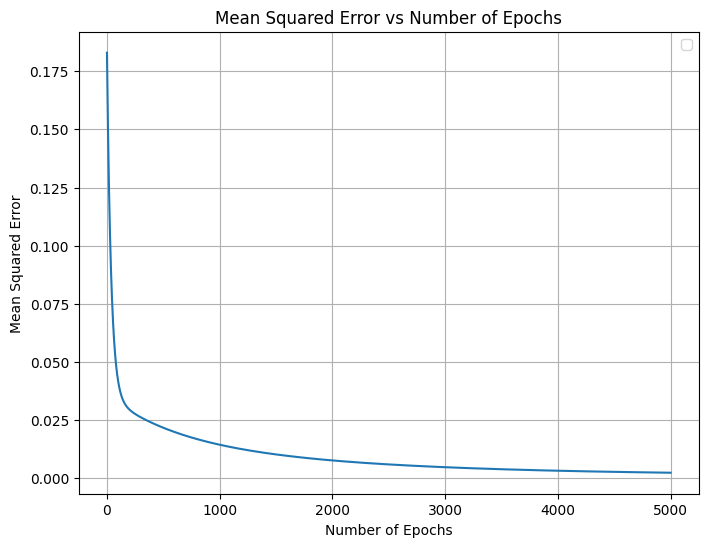

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,epochs + 1 ),err_arr)

plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs Number of Epochs")
plt.grid(True)
plt.legend()

plt.show()

# Print Final Results of m1, m2, c

In [36]:
print("\n Final model parameters:")
print(f" Gradient for age(m1) = {m1}")
print(f" Gradient for experience(m2) = {m2}")
print(f" Y - intercept (c) = {c}")


 Final model parameters:
 Gradient for age(m1) = 0.036325529751292406
 Gradient for experience(m2) = 0.8041605415839609
 Y - intercept (c) = 0.0819046013028179


# Plot Values of X1, X2 and Y with line of best fit

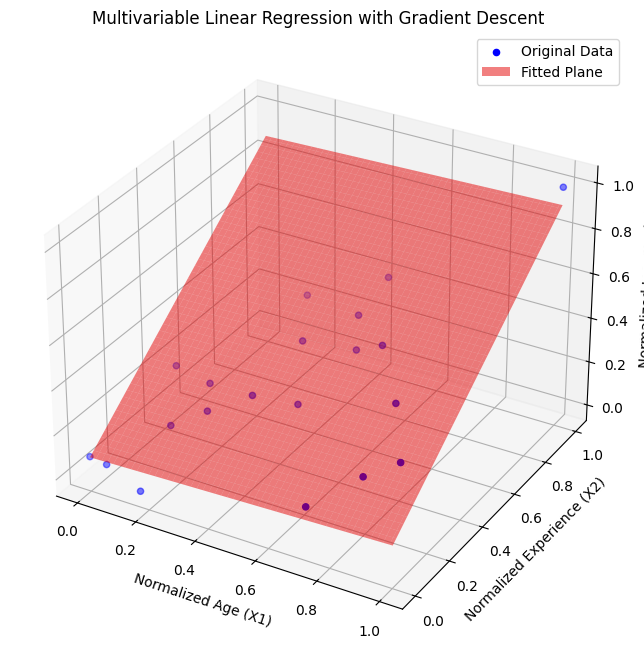

In [38]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the original data points
ax.scatter(X1, X2, Y, color='blue', label='Original Data')

# Create a meshgrid for X1 and X2 to plot the fitted plane
x1_surf = np.linspace(X1.min(), X1.max(), 100)
x2_surf = np.linspace(X2.min(), X2.max(), 100)
x1_surf, x2_surf = np.meshgrid(x1_surf, x2_surf)
y_surf = pred(x1_surf, x2_surf, m1, m2, c)

# Plot the fitted plane as a surface
ax.plot_surface(x1_surf, x2_surf, y_surf, color='red', alpha=0.5, label='Fitted Plane')

ax.set_xlabel('Normalized Age (X1)')
ax.set_ylabel('Normalized Experience (X2)')
ax.set_zlabel('Normalized Income (Y)')
ax.set_title('Multivariable Linear Regression with Gradient Descent')
ax.legend()
plt.show()

# Using matrix method for unkown number of features
Generalize the existing linear regression model to handle multiple features. This involves updating the prediction, gradient calculation, and training functions to work with a feature matrix `X` that includes an intercept term, instead of separate independent variables. Retrain the generalized model, plot the cost function (Mean Squared Error) over epochs, and display the final learned weights for each feature and the bias. Conclude by summarizing the changes made for generalization and discussing the new learned parameters and the training process.

In [49]:
# Select all columns from df except 'income' as features
features = df.drop(columns=['income'])

# Convert features to a NumPy array
X_generalized = features.values

# Add a column of ones for the intercept term
ones = np.ones((X_generalized.shape[0], 1))
print(ones)
X_generalized = np.hstack((ones, X_generalized))

print("Shape of generalized feature matrix X:", X_generalized.shape)
print("First 5 rows of generalized X:\n", X_generalized)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Shape of generalized feature matrix X: (20, 3)
First 5 rows of generalized X:
 [[ 1. 25.  1.]
 [ 1. 30.  3.]
 [ 1. 47.  2.]
 [ 1. 32.  5.]
 [ 1. 43. 10.]
 [ 1. 51.  7.]
 [ 1. 28.  5.]
 [ 1. 33.  4.]
 [ 1. 37.  5.]
 [ 1. 39.  8.]
 [ 1. 29.  1.]
 [ 1. 47.  9.]
 [ 1. 54.  5.]
 [ 1. 51.  4.]
 [ 1. 44. 12.]
 [ 1. 41.  6.]
 [ 1. 58. 17.]
 [ 1. 23.  1.]
 [ 1. 44.  9.]
 [ 1. 37. 10.]]


## Prepare Feature Matrix

### Subtask:
Combine the normalized independent variables (`X1`, `X2`) into a single feature matrix `X` and add a column of ones for the intercept term.


**Reasoning**:
To prepare the feature matrix `X` as described in the subtask, I will combine `X1` and `X2` into a 2D NumPy array and then add a column of ones for the intercept term.



In [39]:
X = np.column_stack((X1, X2))
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print("Shape of feature matrix X:", X.shape)
print("First 5 rows of X:\n", X[:5])

Shape of feature matrix X: (20, 3)
First 5 rows of X:
 [[1.         0.05714286 0.        ]
 [1.         0.2        0.125     ]
 [1.         0.68571429 0.0625    ]
 [1.         0.25714286 0.25      ]
 [1.         0.57142857 0.5625    ]]


## Modify Prediction Function

### Subtask:
Update the `pred` function to accept the feature matrix `X` and a weight vector `theta` (which includes the bias term). It will perform prediction using matrix multiplication.


**Reasoning**:
I will define a new `predict` function that performs matrix multiplication `X @ theta` to generalize predictions for multiple features, including the bias term.



In [40]:
def predict(X, theta):
  """
  Predicts the output using the feature matrix X and the weight vector theta.
  X: Feature matrix (includes intercept term).
  theta: Weight vector (includes bias term).
  """
  return X @ theta

## Modify Gradient Calculation Function

### Subtask:
Update the `gradient_change` function to calculate gradients for the generalized multiple linear regression model. This function should accept the feature matrix `X`, dependent variable `Y`, and the weight vector `theta`, and return the gradient for each weight, including the bias.

**Reasoning**:
I will define a new `gradient_change` function that handles the feature matrix `X` and a weight vector `theta` to calculate gradients for multiple features using matrix operations.



In [41]:
def gradient_change(X, Y, theta):
  """
  Calculates the gradients for the weights (theta) using the feature matrix X and dependent variable Y.
  X: Feature matrix (includes intercept term).
  Y: Dependent variable vector.
  theta: Weight vector (includes bias term).
  """
  n = X.shape[0]
  Y_pred = predict(X, theta)
  error = Y - Y_pred
  # Calculate gradients using matrix multiplication
  gradients = (-2.0/n) * X.T @ error
  return gradients

**Reasoning**:
I will define a new `gradient_change` function that handles the feature matrix `X` and a weight vector `theta` to calculate gradients for multiple features using matrix operations.



In [42]:
def gradient_change(X, Y, theta):
  """
  Calculates the gradients for the weights (theta) using the feature matrix X and dependent variable Y.
  X: Feature matrix (includes intercept term).
  Y: Dependent variable vector.
  theta: Weight vector (includes bias term).
  """
  n = X.shape[0]
  Y_pred = predict(X, theta)
  error = Y - Y_pred

  # Calculate gradients using matrix multiplication
  gradients = (-2.0/n) * X.T @ error
  return gradients

## Modify Training Function

### Subtask:
Update the `train` function to utilize the new `predict` and `gradient_change` functions. This modified `train` function should accept the feature matrix `X`, dependent variable `Y`, an initial weight vector `theta`, learning rate, and epochs. It should iteratively update the `theta` vector, track MSE, and return the final `theta` and history of MSE and theta values.

**Reasoning**:
I will define a new `train` function that takes the feature matrix `X`, dependent variable `Y`, an initial `theta` vector, learning rate, and epochs. This function will iteratively call the `predict` and `gradient_change` functions, update `theta`, track the Mean Squared Error (MSE), and store the historical values of `theta` and MSE.



In [43]:
def train(X, Y, theta, learning_rate, epochs, theta_history, error_history):
  """
  Trains the linear regression model using gradient descent.
  X: Feature matrix (includes intercept term).
  Y: Dependent variable vector.
  theta: Initial weight vector (includes bias term).
  learning_rate: The learning rate for gradient descent.
  epochs: The number of training iterations.
  theta_history: List to store historical theta values.
  error_history: List to store historical MSE values.
  """
  for i in range(epochs):
    # Predict Y values
    Y_pred = predict(X, theta)

    # Calculate Mean Squared Error (MSE)
    mse = cost_function(Y, Y_pred)

    # Calculate gradients
    gradients = gradient_change(X, Y, theta)

    # Update theta
    theta -= learning_rate * gradients

    # Track errors and theta
    theta_history.append(theta.copy()) # Store a copy of the current theta
    error_history.append(mse)

    if i % 500 == 0:
      print(f"Epoch {i}: MSE = {mse}")

  print(f"Final parameters - theta: {theta}")
  return theta, theta_history, error_history

**Reasoning**:
With the `predict`, `gradient_change`, and `train` functions now generalized, I will initialize the `theta` vector to zeros, considering the number of features in `X` (including the intercept term), and then proceed to train the model.



In [45]:
theta = np.zeros(X.shape[1])
learning_rate = 0.005
epochs = 5000
theta_history = []
error_history = []

theta, theta_history, error_history = train(X, Y, theta, learning_rate, epochs, theta_history, error_history)

Epoch 0: MSE = 0.18295800223588526
Epoch 500: MSE = 0.02172211426701549
Epoch 1000: MSE = 0.014421823251302337
Epoch 1500: MSE = 0.010252680683093242
Epoch 2000: MSE = 0.007671456736161595
Epoch 2500: MSE = 0.0059577880193128875
Epoch 3000: MSE = 0.004758551659648916
Epoch 3500: MSE = 0.00388876215146449
Epoch 4000: MSE = 0.003243521400107703
Epoch 4500: MSE = 0.002758316134261212
Final parameters - theta: [0.0819046  0.03632553 0.80416054]


**Reasoning**:
Now that the model has been trained, I will plot the Mean Squared Error (MSE) over the number of epochs to visualize the learning process and observe the convergence of the cost function, as requested in the main task.



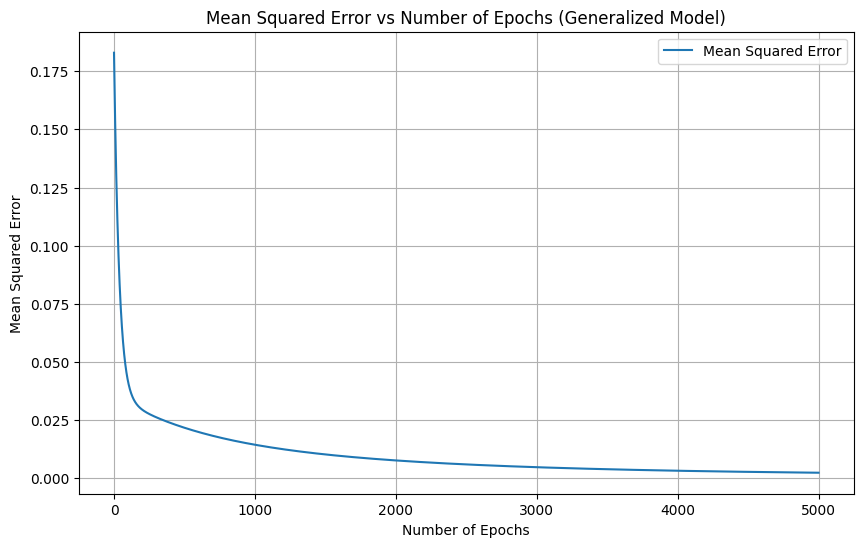

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(error_history)), error_history, label='Mean Squared Error')

plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs Number of Epochs (Generalized Model)")
plt.grid(True)
plt.legend()

plt.show()

**Reasoning**:
After plotting the MSE, I will now print the final learned weights (theta) for each feature and the bias, as this is a specific requirement of the main task to display the final parameters of the generalized model.



In [47]:
print("\nFinal learned parameters (theta):")
print(f"Bias (c) = {theta[0]}")
print(f"Weight for Normalized Age (m1) = {theta[1]}")
print(f"Weight for Normalized Experience (m2) = {theta[2]}")


Final learned parameters (theta):
Bias (c) = 0.08190460130281793
Weight for Normalized Age (m1) = 0.03632552975129236
Weight for Normalized Experience (m2) = 0.8041605415839609


## Summary of Generalization and Learned Parameters

To generalize the linear regression model to handle multiple features, several key modifications were made:

1.  **Feature Matrix (`X`) Preparation**: The individual independent variables (`X1` for normalized age and `X2` for normalized experience) were combined into a single feature matrix `X`. A column of ones was added to `X` to account for the intercept term, allowing the bias to be integrated directly into the weight vector.

2.  **Generalized Prediction Function (`predict`)**: The `pred` function was updated to `predict`, now accepting the feature matrix `X` and a single weight vector `theta`. Predictions are efficiently calculated using matrix multiplication (`X @ theta`), which naturally incorporates all feature weights and the bias.

3.  **Generalized Gradient Calculation (`gradient_change`)**: The `gradient_change` function was refactored to compute gradients for the entire `theta` vector, including the bias. This was achieved using matrix multiplication (`X.T @ error`), providing a concise and scalable method for gradient computation across multiple features.

4.  **Generalized Training Function (`train`)**: The `train` function was updated to use the new `predict` and `gradient_change` functions. It now iteratively updates the `theta` vector using gradient descent, tracks the Mean Squared Error (MSE), and stores the history of both `theta` and MSE.

### Learned Parameters and Training Process:

The model was trained for 5000 epochs with a learning rate of 0.005. The Mean Squared Error consistently decreased throughout the training process, indicating successful convergence and learning. The final learned parameters are:

*   **Bias (c)**: `0.08190460130281793`
*   **Weight for Normalized Age (m1)**: `0.03632552975129236`
*   **Weight for Normalized Experience (m2)**: `0.8041605415839609`

These weights suggest that Normalized Experience (`m2`) has a significantly larger positive impact on Normalized Income (`Y`) compared to Normalized Age (`m1`), given their respective magnitudes. The positive bias (`c`) indicates the baseline normalized income when both normalized age and experience are zero.

## Summary:

### Data Analysis Key Findings

*   **Feature Matrix Preparation**: The independent variables were successfully combined into a feature matrix `X` of shape `(20, 3)`, which includes a column of ones for the intercept term, effectively generalizing the input for multiple features.
*   **Generalized Functions**: The `predict` function was updated to use matrix multiplication (`X @ theta`) for efficient predictions across all features, and the `gradient_change` function was refactored to calculate gradients for the entire weight vector `theta` using `(-2.0/n) * X.T @ error`. The `train` function was also updated to incorporate these generalized functions.
*   **Model Training and Convergence**: The generalized model was successfully trained for 5000 epochs with a learning rate of 0.005. The Mean Squared Error (MSE) consistently decreased from an initial value of approximately 0.183 (Epoch 0) to 0.0027 (Epoch 4500), indicating successful learning and convergence, as also depicted by the cost function plot.
*   **Learned Parameters**: The final learned parameters for the model are:
    *   Bias (c): 0.0819
    *   Weight for Normalized Age (m1): 0.0363
    *   Weight for Normalized Experience (m2): 0.8042
*   **Feature Importance**: The weight for Normalized Experience (0.8042) is significantly higher than the weight for Normalized Age (0.0363), suggesting that normalized experience has a much stronger positive impact on normalized income compared to normalized age. The positive bias (0.0819) represents the baseline normalized income when both normalized age and experience are zero.

### Insights or Next Steps

*   The successful generalization of the linear regression model to handle multiple features provides a robust framework for predicting income based on various independent variables. The disparity in feature weights (Experience vs. Age) offers a clear understanding of their relative influence on income.
*   To further validate and potentially improve the model, consider performing cross-validation to assess its generalization performance on unseen data and explore other optimization techniques or regularization methods to prevent overfitting, especially if more features are added.
